# Exploratory Data Analysis (EDA)

# 1- Importing Key Modules

In [1]:
import warnings
warnings.filterwarnings('ignore')
from __future__ import absolute_import, division, print_function
#For Visuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# For processing and maths
import numpy as np
import pandas as pd
import datetime as dt
import requests
import pickle

In [3]:
# for model implementation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report,accuracy_score

# 2-Data Exploring

In [4]:
df = pd.read_csv('insurance.csv')
df.shape

(1338, 8)

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'alcoholic', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [6]:
df.head()

,age,sex,bmi,children,alcoholic,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


Data Description can be found here:
- age : age of the policyholder
- sex: gender of policy holder (female=0, male=1)
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 25
- children: number of children/dependents of the policyholder
- smoker: smoking state of policyholder (non-smoke=0;smoker=1)
- region: the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3)
- charges: individual medical costs billed by health insurance
- insuranceclaim – The labeled output from the above features, 1 for valid insurance claim / 0 for invalid.

In [7]:
# Checking all variables with their data-type
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

table_dtype = _tbl_dtype(df)
table_dtype

,Data Type
age,int64
sex,int64
children,int64
alcoholic,int64
region,int64
insuranceclaim,int64
bmi,float64
charges,float64


In [8]:
#change data type , df[['a', 'b']] = df[['a', 'b']].astype(float)
df[['sex', 'alcoholic']] = df[['sex', 'alcoholic']].astype(object)

In [9]:
table_dtype = _tbl_dtype(df)
table_dtype

,Data Type
age,int64
children,int64
region,int64
insuranceclaim,int64
bmi,float64
charges,float64
sex,object
alcoholic,object


### 2.1Target Feature

1 being fraud , 0 being valid

In [10]:
df['insuranceclaim'].value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

In [11]:
n_group = df['insuranceclaim'].value_counts()
n_group_sum = n_group.sum()

print('valid insurance claim: {}'.format(n_group[0]))
print('fraud insurance claim: {}'.format(n_group[1]))

print('percentage of valid claims: {:.2f} {}'.format(n_group[0]/n_group_sum*100, '%'))
print('percentage of fraud claims: {:.2f} {}'.format(n_group[1]/n_group_sum*100, '%'))

valid insurance claim: 555
fraud insurance claim: 783
percentage of valid claims: 41.48 %
percentage of fraud claims: 58.52 %


# 3)- Preprocessing

In [12]:
# missing value check
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
alcoholic         0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [13]:
# duplicate value check
df.duplicated().sum()

1

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'region'}>],
       [<AxesSubplot:title={'center':'charges'}>,
        <AxesSubplot:title={'center':'insuranceclaim'}>]], dtype=object)

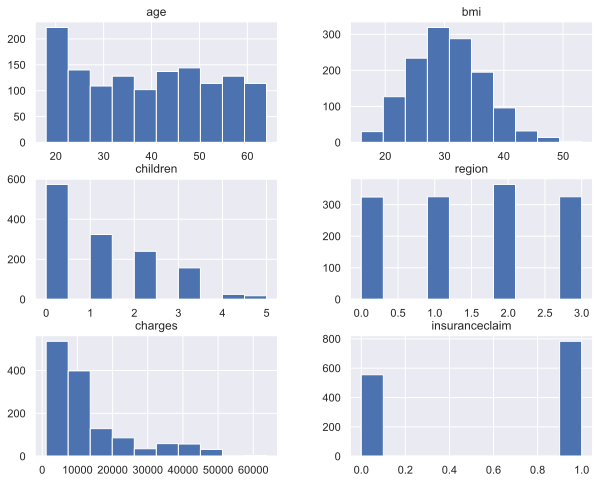

In [14]:
# histogram
df.hist(figsize=(10,8))

age                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
sex               AxesSubplot(0.398529,0.657941;0.227941x0.222059)
bmi               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
children             AxesSubplot(0.125,0.391471;0.227941x0.222059)
alcoholic         AxesSubplot(0.398529,0.391471;0.227941x0.222059)
region            AxesSubplot(0.672059,0.391471;0.227941x0.222059)
charges                 AxesSubplot(0.125,0.125;0.227941x0.222059)
insuranceclaim       AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

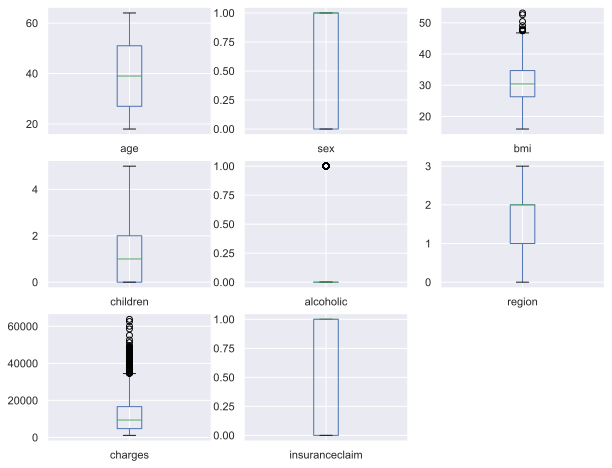

In [15]:
# box plot

df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

In [16]:
# check correlation between features
corr = df[df.columns].corr()

<AxesSubplot:>

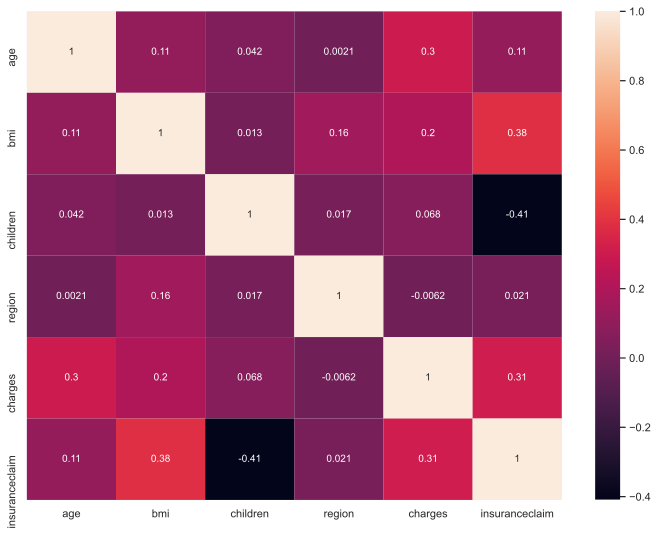

In [17]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, annot = True)

In [18]:
# feature relationship


def plot_relation_per_feature(data, feature): # notice feature in function is not same as features
    grouped_by_Outcome = df[feature].groupby(df["insuranceclaim"])
    diabetic_per_feature = pd.DataFrame({"fraud": grouped_by_Outcome.get_group(1),
                                        "valid": grouped_by_Outcome.get_group(0),
                                        })
    hist = diabetic_per_feature.plot.hist(bins=60, alpha=0.6)
    hist.set_xlabel(feature)
    plt.show()

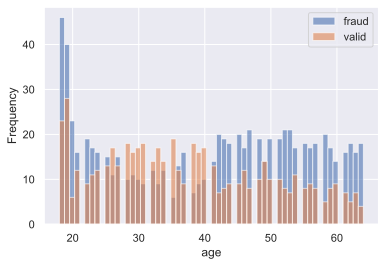

In [19]:
plot_relation_per_feature(df, "age")

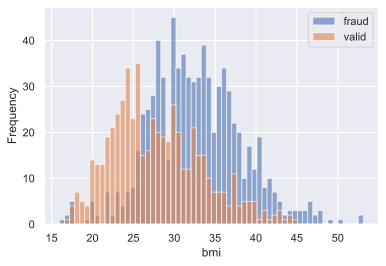

In [20]:
plot_relation_per_feature(df, "bmi")

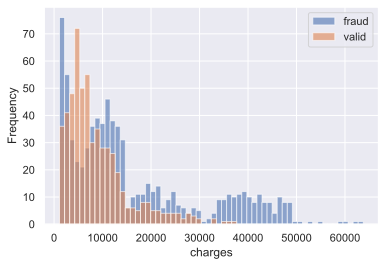

In [21]:
plot_relation_per_feature(df, "charges")

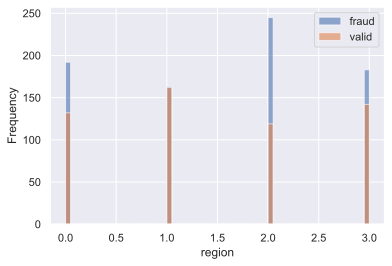

In [22]:
plot_relation_per_feature(df, "region")

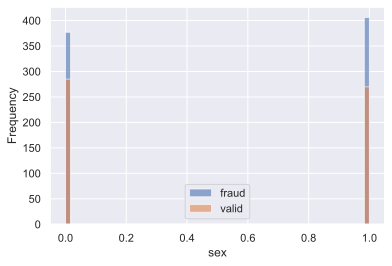

In [23]:
plot_relation_per_feature(df, "sex")

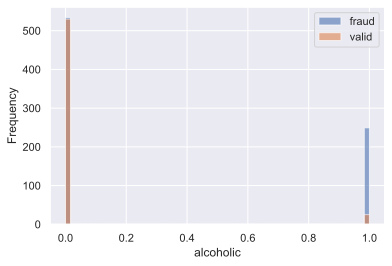

In [24]:
plot_relation_per_feature(df, "alcoholic")

# 4-Model Training

In [25]:
df.head(2)

,age,sex,bmi,children,alcoholic,region,charges,insuranceclaim
0,19,0,27.90,0,1,3,16884.9240,1
1,18,1,33.77,1,0,2,1725.5523,1


In [26]:
df_train=df.copy()
y=df_train['insuranceclaim']
X=df_train[['age','sex','bmi','children','alcoholic','region','charges']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2021)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 7)
(268, 7)
(1070,)
(268,)


### 4.1.Logistic Classifeir

In [28]:
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
predictions_lg = logreg.predict(X_test)

In [29]:
print(accuracy_score(y_test, predictions_lg))

0.7686567164179104


In [30]:
print(classification_report(y_test, predictions_lg))

              precision    recall  f1-score   support

           0       0.80      0.64      0.72       121
           1       0.75      0.87      0.81       147

    accuracy                           0.77       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.77      0.77      0.76       268



In [31]:
lg_acc=accuracy_score(y_test, predictions_lg)

### 4.2.Random Forest

In [32]:
rf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)


In [33]:
print(accuracy_score(y_test, pred_rf))

0.9514925373134329


In [34]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       121
           1       0.95      0.96      0.96       147

    accuracy                           0.95       268
   macro avg       0.95      0.95      0.95       268
weighted avg       0.95      0.95      0.95       268



In [35]:
rf_acc=accuracy_score(y_test, pred_rf)

### 4.3.Support Vector Machine

In [36]:
svc = SVC(kernel='linear', random_state=0)
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [37]:
print(accuracy_score(y_test, pred_svc))

0.8432835820895522


In [38]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.76      0.81       121
           1       0.82      0.91      0.86       147

    accuracy                           0.84       268
   macro avg       0.85      0.84      0.84       268
weighted avg       0.85      0.84      0.84       268



In [39]:
svc_acc=accuracy_score(y_test, pred_svc)

### 4.4. Naive Bayes

In [40]:
nb = GaussianNB()
nb.fit(X_train,y_train)
pred_nb = nb.predict(X_test)

In [41]:
print(accuracy_score(y_test, pred_nb))

0.7835820895522388


In [42]:
print(classification_report(y_test, pred_nb))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79       121
           1       0.89      0.69      0.78       147

    accuracy                           0.78       268
   macro avg       0.80      0.79      0.78       268
weighted avg       0.81      0.78      0.78       268



In [43]:
nb_acc=accuracy_score(y_test, pred_nb)

### 4.5.KNN

In [44]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
# For minkowski, we need to pick parameter. 1 was for manhaten distance and p=2 for Euclidean distance.
knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)

In [45]:
print(accuracy_score(y_test, pred_knn))

0.6231343283582089


In [46]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.60      0.50      0.55       121
           1       0.64      0.72      0.68       147

    accuracy                           0.62       268
   macro avg       0.62      0.61      0.61       268
weighted avg       0.62      0.62      0.62       268



In [47]:
knn_acc=accuracy_score(y_test, pred_knn)

### 4.6.Decision Tree

In [48]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred_dt = knn.predict(X_test)

In [49]:
print(accuracy_score(y_test, pred_dt))

0.6231343283582089


In [50]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.60      0.50      0.55       121
           1       0.64      0.72      0.68       147

    accuracy                           0.62       268
   macro avg       0.62      0.61      0.61       268
weighted avg       0.62      0.62      0.62       268



In [51]:
dt_acc=accuracy_score(y_test, pred_dt)

# Who's Winner?

In [52]:
models = pd.DataFrame({
    'Model': ['Logistic Model', 'Decison Tree', 'Support Vector Machine', 'Random Forest','Naive-Bayes','K-Nearest Neighbor',],
    'Accuracy-Score': [lg_acc, dt_acc, svc_acc, rf_acc,nb_acc,knn_acc]})
models.sort_values(by='Accuracy-Score', ascending=False)

,Model,Accuracy-Score
3,Random Forest,0.951493
2,Support Vector Machine,0.843284
4,Naive-Bayes,0.783582
0,Logistic Model,0.768657
1,Decison Tree,0.623134
5,K-Nearest Neighbor,0.623134


# 5- Hyper-parameter Tunning for Random Forest

In [53]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42, 
                            class_weight='balanced')

In [54]:
parameters = {'max_features': [1, 2, 4], 'min_samples_leaf': [3, 5, 7, 9], 'max_depth': [5,10,15]}

In [55]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

In [56]:
%%time
rf_grid_search = GridSearchCV(rf, parameters, n_jobs=-1, scoring='accuracy', cv=skf, verbose=True)
rf_grid_search = rf_grid_search.fit(X, y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Wall time: 8.44 s


In [57]:
print(rf_grid_search.best_score_)

0.9768321314774443


In [58]:
rf_grid_search.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=15, max_features=4,
                       min_samples_leaf=3, n_jobs=-1, random_state=42)

### best feature

In [59]:
pd.DataFrame({'feat': X,
              'coef': rf_grid_search.best_estimator_.feature_importances_}).sort_values(by='coef', ascending=False)

,feat,coef
2,"(b, m, i)",0.393528
3,"(c, h, i, l, d, r, e, n)",0.323729
4,"(a, l, c, o, h, o, l, i, c)",0.115922
6,"(c, h, a, r, g, e, s)",0.097914
0,"(a, g, e)",0.058840
5,"(r, e, g, i, o, n)",0.006645
1,"(s, e, x)",0.003422
